## Recognising Sign Language Hand Gestures (MNIST Dataset)
The MNIST Sign Language dataset contains thousands of images of American Sign Language (ASL) hand gestures. Each hand gesture refers to a letter of the alphabet. I shall be trying to create a visualisation model that can recognise and map the hand gestures to letters they represent, as accurately as possible.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train = pd.read_csv("../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


The training set has 27455 images, whilst the test set has 7172 images. The 785 features represent the individual pixels of the 28x28 sized images. 

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
x_train = train.drop(['label'], axis=1)
x_train = x_train.values
y_train = train['label']

x_test = test.drop(['label'], axis=1)
x_test = x_test.values
y_test = test['label']

In [6]:
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

The images in both the training and test set are first normalised, so that the pixel values are between 0 and 1. Then I reshape the training/test sets so that they are the correct tensor shape for inputing into the convolutional layers of my network model. 

# Dataset Visualisation

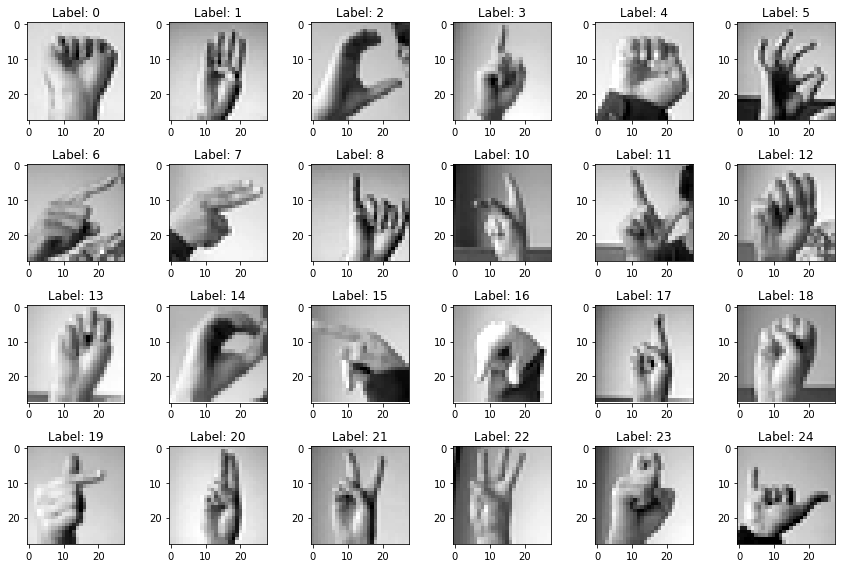

In [7]:
img_examples = []
for i in range(25):
    if i == 9:
        continue
    img_examples.append(np.where(y_train == i)[0][0])

fig, ax = plt.subplots(4, 6, figsize=(12, 8))

n = 0
for i in range(4):
    for j in range(6):
        idx = img_examples[n]
        ax[i, j].imshow(x_train[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title("Label: {}".format(y_train[idx]))
        n += 1
fig.tight_layout()

This shows an example of a hand gesture for each letter of the alphabet. There are 24 letters that are represented in the dataset, and the letters are replaced with numbers 0 - 24. Each image is size 28x28, in greyscale with only one colour channel.

Text(0, 0.5, 'Count')

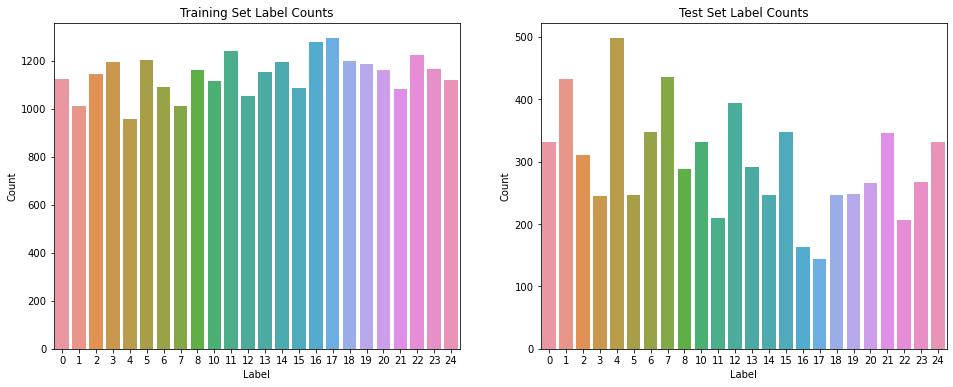

In [8]:
y_train_counts = y_train.value_counts()
y_test_counts = y_test.value_counts()


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(y_train_counts.index, y_train_counts.values, ax=ax[0])
sns.barplot(y_test_counts.index, y_test_counts.values, ax=ax[1])
ax[0].set_title("Training Set Label Counts")
ax[0].set_xlabel("Label")
ax[0].set_ylabel("Count")
ax[1].set_title("Test Set Label Counts")
ax[1].set_xlabel("Label")
ax[1].set_ylabel("Count")

The training set has a far more even distribution of label examples than the test set. However for learning, we are more interested in the training set having an even distribution of label examples.

# Visualisation Model
The model is built using the Keras Sequential interface, and consists of convolutional and max pooling layers, followed by flattening the 2D image matrix into a 1D vector that is fed through dense layers. The final layer is a softmax layer that predicts which of the letters the image represents. 

In [9]:
model = Sequential()

model.add(Conv2D(50 ,(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(40 ,(3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(30 ,(3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=25, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 50)        200       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 40)        18040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 40)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 40)          160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 30)          1

In [10]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Train on 27455 samples, validate on 7172 samples
Epoch 1/20
27455/27455 [==============================] - 11s 383us/sample - loss: 1.1131 - accuracy: 0.6796 - val_loss: 0.2971 - val_accuracy: 0.9057
Epoch 2/20
27455/27455 [==============================] - 6s 212us/sample - loss: 0.1169 - accuracy: 0.9716 - val_loss: 0.2744 - val_accuracy: 0.9230
Epoch 3/20
27455/27455 [==============================] - 6s 210us/sample - loss: 0.0526 - accuracy: 0.9866 - val_loss: 0.2865 - val_accuracy: 0.9129
Epoch 4/20
27455/27455 [==============================] - 6s 208us/sample - loss: 0.0409 - accuracy: 0.9888 - val_loss: 0.2386 - val_accuracy: 0.9175
Epoch 5/20
27455/27455 [==============================] - 6s 213us/sample - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.3971 - val_accuracy: 0.8854
Epoch 6/20
27455/27455 [==============================] - 6s 213us/sample - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.2731 - val_accuracy: 0.9324
Epoch 7/20
27455/27455 [==========================

The final accuracy of the model on the test set is 0.9458 (or 94.58%).

The following shows the confusion matrix between the predictions and actual labels of the test set, using the model that has been trained above.

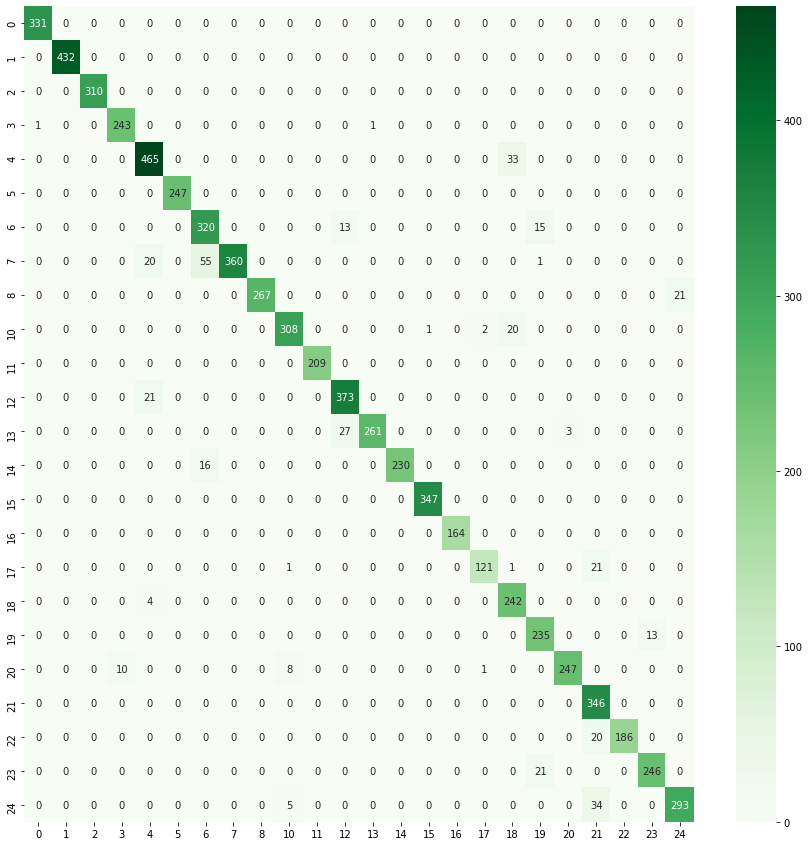

In [11]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict_classes(x_test)
cm = confusion_matrix(y_test, y_pred, labels=[i for i in range(25) if i != 9])
cm = pd.DataFrame(cm , index=[i for i in range(25) if i != 9] , columns=[i for i in range(25) if i != 9])
plt.figure(figsize=(15,15))
sns.heatmap(cm, cmap= "Greens", annot=True, fmt='')


The model's accuracy is not fantastic at 94.58%. To improve this performance further, more training data is definitely needed. This could be achieved by data augmentation, such as cropping/rotating/shifting the images in the dataset to generate even more images to train on. 

There is definitely a case of overfitting here as the final training accuracy is 99.8%. Dropout is already being used for the Dense layers of the model, however perhaps some dropout between the convolutional layers could also be used to further prevent overfitting.

# Improvements to Model
Below I've created an ImageDataGenerator object that can augment the images of the training set in real time to further improve the training of the model. This will be used to feed training batches to the model during learning instead of the original dataset.

In [13]:
train_gen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1)

train_gen.fit(x_train)

I shall also add some dropout layers between the convolutional layers of my model, to further prevent overfitting. In addition, the number of filters has been increased for all convolutional layers.

In [14]:
model = Sequential()

model.add(Conv2D(75 ,(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(50 ,(3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(25 ,(3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=25, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 75)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 75)        300       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 50)         

In [15]:
history = model.fit(train_gen.flow(x_train, y_train, batch_size=32), epochs=20, validation_data=(x_test, y_test))

Train for 858 steps, validate on 7172 samples
Epoch 1/20
858/858 [==============================] - 15s 18ms/step - loss: 2.8040 - accuracy: 0.2215 - val_loss: 1.1509 - val_accuracy: 0.6182
Epoch 2/20
858/858 [==============================] - 14s 16ms/step - loss: 1.3455 - accuracy: 0.5470 - val_loss: 0.7074 - val_accuracy: 0.7625
Epoch 3/20
858/858 [==============================] - 15s 17ms/step - loss: 0.8739 - accuracy: 0.7023 - val_loss: 0.3325 - val_accuracy: 0.8957
Epoch 4/20
858/858 [==============================] - 15s 17ms/step - loss: 0.6370 - accuracy: 0.7824 - val_loss: 0.2580 - val_accuracy: 0.9027
Epoch 5/20
858/858 [==============================] - 14s 16ms/step - loss: 0.5094 - accuracy: 0.8273 - val_loss: 0.1255 - val_accuracy: 0.9548
Epoch 6/20
858/858 [==============================] - 14s 16ms/step - loss: 0.4388 - accuracy: 0.8532 - val_loss: 0.0913 - val_accuracy: 0.9639
Epoch 7/20
858/858 [==============================] - 14s 17ms/step - loss: 0.3779 - accur

So this time, the model has achieved a final test accuracy score of 0.9987 (99.87%). This is much better than before and the model is no longer overfitting.

In [16]:
model.save_weights("/kaggle/working/model_weights.h5")

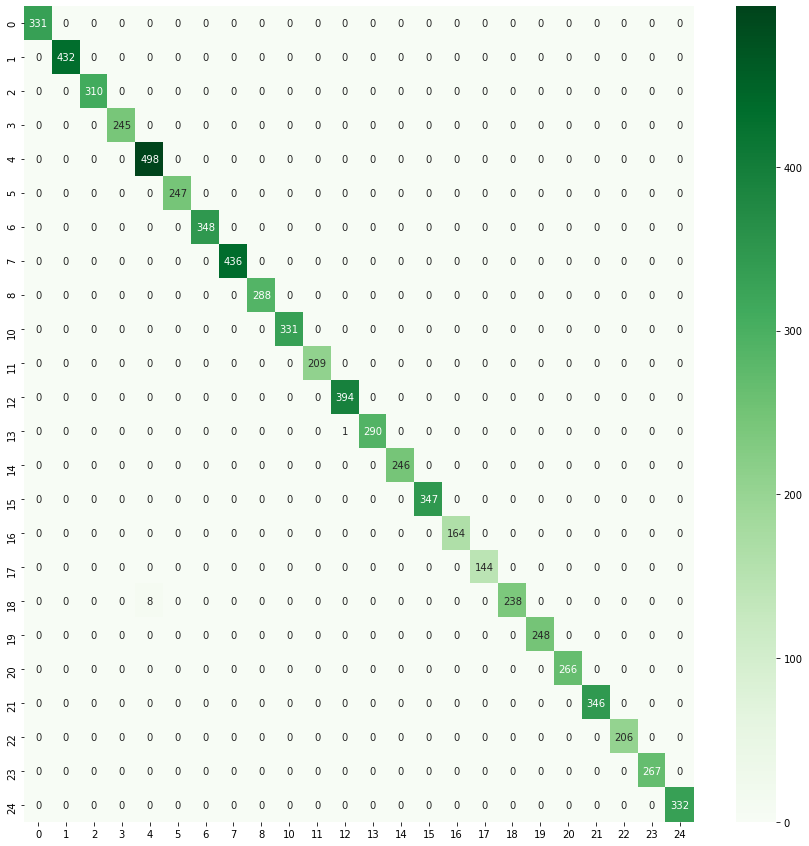

In [17]:
y_pred = model.predict_classes(x_test)
cm = confusion_matrix(y_test, y_pred, labels=[i for i in range(25) if i != 9])
cm = pd.DataFrame(cm , index=[i for i in range(25) if i != 9] , columns=[i for i in range(25) if i != 9])
plt.figure(figsize=(15,15))
sns.heatmap(cm, cmap= "Greens", annot=True, fmt='')

# Conclusion
Improving the model with training data augmentation and more dropout layers helped to prevent overfitting. The final test accuracy achieved from the second model was 99.87%, compared to 94.58% of the previous model I trained. This is a great improvement and has particularly taught me the importance of using data augmentation for image datasets. 